#  **<font color='white gray'>@panData</font>**
# - **<font color='white gray'>Data Analysis Projects with Python Language</font>**
# - **<font color='white gray'>Feature Engineering Techniques</font>**


## **Python Packages Used in the Project**

In [107]:
!pip install -q -U watermark

In [108]:
# 1. Imports
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
%reload_ext watermark
%watermark -a "@panData"

Author: @panData



### **Loading the Data and Understanding the Variables**

In [110]:
# 2. Loading the data
df = pd.read_csv("dataset.csv")

In [111]:
# 3. Shape
df.shape

(101766, 50)

In [112]:
# 4. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222167,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [113]:
# 5. Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### **Data Cleaning and Transformation**

In [114]:
# 6. Checking for null (missing) values
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [115]:
# 7. Checking columns with values equal to '?'
df.isin(['?']).any()

,0
encounter_id,False
patient_nbr,False
race,True
gender,False
age,False
weight,True
admission_type_id,False
discharge_disposition_id,False
admission_source_id,False
time_in_hospital,False


In [116]:
# 8. Columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [117]:
# 9. Checking unique values
for col in list(df.columns):

    # Get a list of unique values
    list_of_unique_values = df[col].unique()

    # If the number of unique values is less than 15, print the values.
    # Otherwise, print the number of unique values
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' unique values')




encounter_id: 101766 unique values


patient_nbr: 71518 unique values


race: 6 unique values
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 unique values
['Female' 'Male' 'Unknown/Invalid']


age: 10 unique values
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 unique values
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 unique values
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 unique values


admission_source_id: 17 unique values


time_in_hospital: 14 unique values
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 unique values


medical_specialty: 73 unique values


num_lab_procedures: 118 unique values


num_procedures: 7 unique values
[0 5 1 6 2 3 4]


num_medications: 75 unique values


number_outpatient: 39 unique values


number_emergency: 33 unique values


number_inpatient: 21 unique va

**The character '?' is simply a missing value. Let's clean this up.**

In [118]:
# 10. Checking the quantity and percentage of records where the value is equal to '?'
for col in df.columns:
    if df[col].dtype == object:
        if df[col][df[col] == '?'].count() > 0:
            print('\nColumn', col, 'has', df[col][df[col] == '?'].count(), 'values with the character "?"')
            print('This represents', round(df[col][df[col] == '?'].count() / len(df.index) * 100, 2), '% of the total')



Column race has 2273 values with the character "?"
This represents 2.23 % of the total

Column weight has 98569 values with the character "?"
This represents 96.86 % of the total

Column payer_code has 40256 values with the character "?"
This represents 39.56 % of the total

Column medical_specialty has 49949 values with the character "?"
This represents 49.08 % of the total

Column diag_1 has 21 values with the character "?"
This represents 0.02 % of the total

Column diag_2 has 358 values with the character "?"
This represents 0.35 % of the total

Column diag_3 has 1423 values with the character "?"
This represents 1.4 % of the total


In [119]:
# 11. The 'gender' column also has a value we need to handle
print('\nColumn gender has', df['gender'][df['gender'] == 'Unknown/Invalid'].count(), 'values with "Unknown/Invalid"')
print('This represents', round(df['gender'][df['gender'] == 'Unknown/Invalid'].count() / len(df.index) * 100, 2), '% of the total')


Column gender has 3 values with "Unknown/Invalid"
This represents 0.0 % of the total


**Now the important part - deciding what to do!**

- There are missing values for **patient weight** in more than **96%** of the records.

- The **payer code** and **medical specialty** also have missing values ranging from **40% to 50%**.

- The remaining variables have a low percentage of missing values.

What should we do?

**Alternatives:**

- Set the **weight** variable as categorical with two labels: available / not available (1 and 0).
- Create a generic code for the **payer_code** variable as 99 and fill in the missing values.
- Assign a generic type for the **medical_specialty** variable as "No Defined Specialty" and fill in the missing values.
- For the **gender** variable, there are only 3 records; it’s ideal to remove them.

**Decision:**

1. Due to the weak interpretability of the missing values in the **weight** variable, it’s best to simply ignore and remove this variable.
  
2. We’ll discard the **payer_code** and **medical_specialty** variables since handling a large amount of missing data would be difficult.

3. We’ll remove the records with "?" from the remaining variables.

4. For the **gender** variable, we’ll remove the 3 records with the "Unknown/Invalid" category.

In [120]:
# 12. Removing the 3 columns with a high percentage of missing values
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

**For the remaining variables with a low percentage of missing values, we’ll remove the records.**

In [121]:
# 13. Removing records with a low percentage of missing values
df = df[df['race'] != '?']
df = df[df['diag_1'] != '?']
df = df[df['diag_2'] != '?']
df = df[df['diag_3'] != '?']
df = df[df['gender'] != 'Unknown/Invalid']

In [122]:
# 14. Checking columns with values equal to '?'
df.isin(['?']).any()

,0
encounter_id,False
patient_nbr,False
race,False
gender,False
age,False
admission_type_id,False
discharge_disposition_id,False
admission_source_id,False
time_in_hospital,False
num_lab_procedures,False


In [123]:
# 15. Shape
df.shape

(98052, 47)

Do we have variables with only a single value?

In [124]:
# 16. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [125]:
# 17. Checking for variables with a single value (i.e., constant)
df.loc[:, df.nunique() == 1].head()

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No


**Let's eliminate the columns that have only a single unique value, as they add no value to our analysis. We want to analyze variables, not constants.**

In [126]:
# 18. Removing variables with unique values
df = df.loc[:, df.nunique() != 1]

In [127]:
# 19. Shape
df.shape

(98052, 44)

In [128]:
# 20. Calculating the total number of values in each column
total_values = df.shape[0]

# Calculating the number of missing values in each column
missing_values = df.isnull().sum()

# Calculating the percentage of missing values in each column
missing_percentage = (missing_values / total_values) * 100

# Display only columns with a percentage greater than zero
missing_percentage[missing_percentage > 0]


,0
max_glu_serum,94.688533
A1Cresult,83.485294


In [129]:
# 21. Removing the 2 columns with a high percentage of missing values
df = df.drop(['max_glu_serum', 'A1Cresult'], axis=1)

In [130]:
# 22. Shape
df.shape

(98052, 42)

## **Feature Engineering**

### **Adjusting the Target Variable for Risk Stratification**

A hospital readmission occurs when a patient discharged from the hospital is readmitted within a certain period. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality and also negatively impact medical costs.

Our target variable is **'readmitted'**. We want to determine if a patient will be readmitted to the hospital or not.

The variable has the following values:

- **< 30** (readmission within 30 days)
- **> 30** (readmission after 30 days)
- **No** (no readmission)

We can combine readmission within 30 days and after 30 days into one category (value **1** - positive class) and no readmission into another category (value **0** - negative class) to make our problem a binary classification.

In [131]:
# 23. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [132]:
# 24. Counting values in the 'readmitted' variable
df['readmitted'].value_counts()

,count
readmitted,
NO,52337
>30,34649
<30,11066


In [133]:
# 25. First, let's create a copy of the dataset up to this point
cleaned_data1 = df.copy()

# If you need to return to this point, simply execute:
# df = cleaned_data1

# This way, you won't have to run the entire  notebook up to this point

In [134]:
# 26. Adjusting the target variable

# '0' means no readmission
# '1' means readmission, regardless of the number of days after discharge

df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [135]:
# 27. Checking unique values
df['readmitted'].unique()

array([1, 0])

In [136]:
# 28. Checking the data type
df['readmitted'].dtype

dtype('int64')

In [137]:
# 29. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [138]:
# 30. Checking the proportion of each class
round(df.readmitted.value_counts() / len(df.index) * 100, 0)

,count
readmitted,
0,53.0
1,47.0


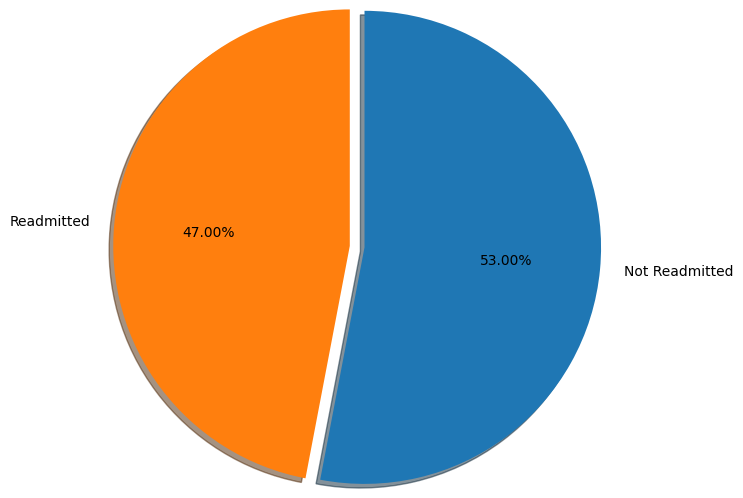

In [139]:
# Adjusting for the provided code context, using df_dsa

# Importing required library
import matplotlib.pyplot as plt

# 31. Visualizing the data graphically

# Percentage of each value in the target variable
percentage = round(df['readmitted'].value_counts() / len(df.index) * 100, 0)

# Labels
labels = ['Not Readmitted', 'Readmitted']

# Plot
plt.axis("equal")
plt.pie(percentage,
        labels=labels,
        radius=1.6,
        autopct='%1.2f%%',
        explode=[0.05, 0.05],
        startangle=90,
        shadow=True,
        counterclock=False,
        pctdistance=0.6)
plt.show()

Approximately **47%** of diabetes patients were readmitted to hospitals.

### **Variable Recategorization**

How should we handle the age variable?

In [140]:
# 33. Variable type
df['age'].dtype

dtype('O')

In [141]:
# 34. Total patients by age group
df.groupby('age').size()

,0
age,
[0-10),65
[10-20),466
[20-30),1478
[30-40),3548
[40-50),9265
[50-60),16697
[60-70),21809
[70-80),25305
[80-90),16702


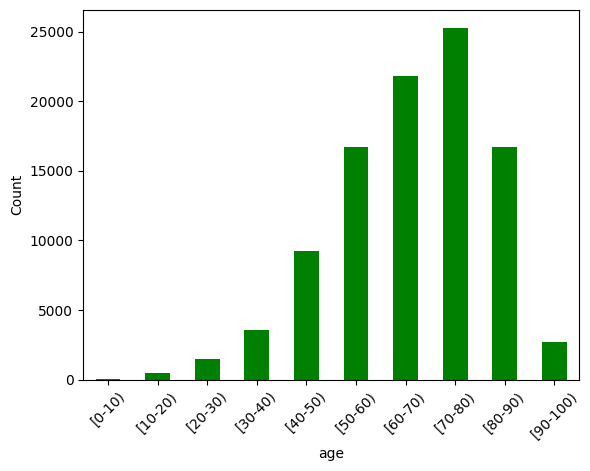

In [142]:
# 35. Checking the variable representing patient age range

# Grouping data by age and plotting a bar chart
df.groupby('age').size().plot(kind='bar', color='green')

# Adding label to the y-axis
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

We can observe that most patients fall within the age range of **50 to 90 years**.

There are different ways to handle this variable. The dataset only provides age in 10-year ranges, so we don’t know each patient's exact age.

We can adopt two approaches:

1. **Numerical Midpoint Approach**: If we want to examine the effect of increasing age on patient readmission, even approximately, we can assume that the patient's age is at the midpoint of their age category. For example, if a patient's age category is 20 to 30 years, we assume an age of 25 years. Then, we convert age categories to midpoints, resulting in a numeric variable.

2. **Categorical Recategorization**: Alternatively, we can recategorize the variable by grouping patients into a smaller number of broader age ranges and keep the variable as categorical. In this case, we could assess the risk by age range instead of specific age values.

We’ll adopt **option 2** as it preserves the information in the data more accurately.

In [143]:
# 36. Recategorizing 'age' to distribute the population more evenly

# Classifying patients up to 50 years in the range of 0-50
df['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
                       for val in df['age']], index=df.index)

# Grouping ages above 80 in the range of 80-100
df['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                       for val in df['age']], index=df.index)

# The other ranges remain unchanged

In [144]:
# 37. Variable type
df['age'].dtype

dtype('O')

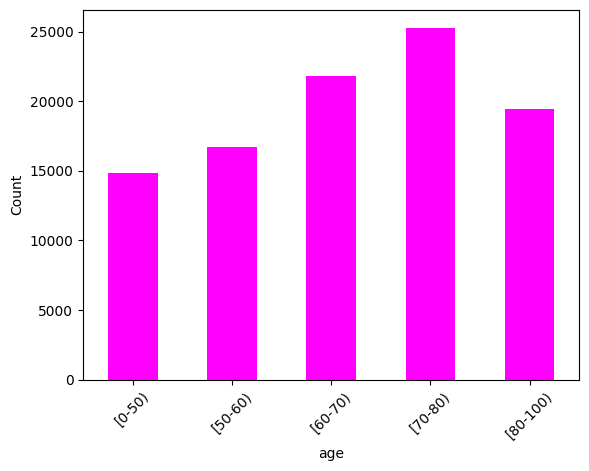

In [145]:
# 38. Checking the variable representing patient age range

# Grouping data by age and plotting a bar chart
df.groupby('age').size().plot(kind='bar', color='magenta')

# Adding label to the y-axis
plt.ylabel('Count')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

How do we handle ID-type variables? We will proceed with Variable Recategorization.

The variables **'admission_type_id'**, **'discharge_disposition_id'**, and **'admission_source_id'** have values with similar meanings. They can be merged to reduce the number of unique values.

In [146]:
# 39. Viewing the data
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


Variable **admission_type_id**

In [147]:
# 40. Unique values in 'admission_type_id'
df['admission_type_id'].unique()


array([1, 2, 3, 6, 4, 5, 8, 7])

In [148]:
# 41. Number of unique values in 'admission_type_id'
df['admission_type_id'].nunique()

8

In [149]:
# 42. Value counts for 'admission_type_id'
df['admission_type_id'].value_counts()

,count
admission_type_id,
1,52178
3,18193
2,17543
6,5135
5,4661
8,312
7,20
4,10


In [150]:
# 43. The 'admission_type_id' variable contains 8 levels
# We will reduce the levels of 'admission_type_id' to two categories
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other'
                                     for val in df['admission_type_id']], index=df.index)

In [151]:
# 44. Number of unique values in 'admission_type_id' after recategorization
df['admission_type_id'].nunique()

2

In [152]:
# 45. Value counts for 'admission_type_id' after recategorization
df['admission_type_id'].value_counts()

,count
admission_type_id,
Emergency,52178
Other,45874


Variable **discharge_disposition_id**

In [153]:
# 46. Unique values in 'discharge_disposition_id'
df['discharge_disposition_id'].unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [154]:
# 47. Number of unique values in 'discharge_disposition_id'
df['discharge_disposition_id'].nunique()

26

In [155]:
# 48. Value counts for 'discharge_disposition_id'
df['discharge_disposition_id'].value_counts()

,count
discharge_disposition_id,
1,57609
3,13564
6,12626
18,3624
2,2049
22,1970
11,1606
5,1127
25,941


In [156]:
# 49. The 'discharge_disposition_id' variable contains 26 levels
# We will reduce the levels of 'discharge_disposition_id' to two categories
df['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other'
                                            for val in df['discharge_disposition_id']], index=df.index)


In [157]:
# 50. Number of unique values in 'discharge_disposition_id' after recategorization
df['discharge_disposition_id'].nunique()


2

In [158]:
# 51. Value counts for 'discharge_disposition_id' after recategorization
df['discharge_disposition_id'].value_counts()

,count
discharge_disposition_id,
Home,57609
Other,40443


Variável **admission_source_id**

In [159]:
# 52. Unique values in 'admission_source_id'
df['admission_source_id'].unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [160]:
# 53. Number of unique values in 'admission_source_id'
df['admission_source_id'].nunique()

17

In [161]:
# 54. Value counts for 'admission_source_id'
df['admission_source_id'].value_counts()

,count
admission_source_id,
7,55951
1,28355
17,6602
4,2945
6,1893
2,1031
5,846
3,179
20,160


In [162]:
# 55. The 'admission_source_id' variable contains 17 levels
# We will reduce the levels of 'admission_source_id' to three categories
df['admission_source_id'] = pd.Series(['Emergency_Room' if val == 7 else 'Referral' if val == 1 else 'Other'
                                       for val in df['admission_source_id']], index=df.index)


In [163]:
# 56. Number of unique values in 'admission_source_id' after recategorization
df['admission_source_id'].nunique()

3

In [164]:
# 57. Value counts for 'admission_source_id' after recategorization
df['admission_source_id'].value_counts()

,count
admission_source_id,
Emergency_Room,55951
Referral,28355
Other,13746


### **We'll continue in the next tutorial.**

In [165]:
%watermark -a "@panData"

Author: @panData



In [166]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [167]:
%watermark --iversions

pandas    : 2.2.2
re        : 2.2.1
numpy     : 1.26.4
seaborn   : 0.13.2
matplotlib: 3.8.0



# **The End**